<a href="https://colab.research.google.com/github/masatokg/AI_teach2020/blob/master/2020AI0203_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ワインデータの分類をランダムフォレストで行う

In [ ]:
# ライブラリの読み込み
import pandas as pd
# データを学習用とテスト用にわけるライブラリ
from sklearn.model_selection import train_test_split
# ランダムフォレストアルゴリズムの学習モデル(分類)
from sklearn.ensemble import RandomForestClassifier
# 学習精度を評価するライブラリ
from sklearn.metrics import accuracy_score
# 分類結果を出力するライブラリ
from sklearn.metrics import classification_report

## ワインデータの読み込み

In [ ]:
# webから読み込むためのライブラリ
from urllib.request import urlretrieve
# uciのサイトから読み込むためのurl文字列
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
savepath = "winequality-white.csv"
# データをwebアクセスでコピーして指定したファイルパス・ファイル名に保存
urlretrieve(url, savepath)

('winequality-white.csv', <http.client.HTTPMessage at 0x7fa111822fd0>)

## ワインデータのファイルをプログラムに読み込んで表示（区切り文字をセミコロン「;」で指定）

In [ ]:
# 変数wineにデータ保持
wine = pd.read_csv(savepath, sep=";", encoding="utf-8")
# 読み込んだデータの最初のほうを表示
print( wine.head() )
wine.head()

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6

[5 rows x 12 columns]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## (追加)ワインデータの様子（品質ランクごとの数）をグラフ表示してみる

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


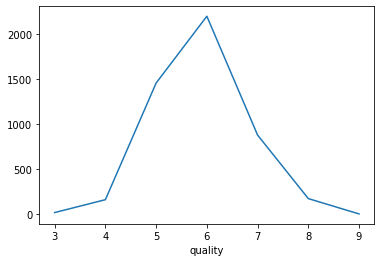

In [ ]:
# 品質ランクごとのデータ数をカウントする
count_data = wine.groupby('quality')["quality"].count()
print(count_data)
# カウントをグラフ描画
# グラフ用のプロットデータを作る
count_data.plot()
# 描画用のライブラリ matlotlibをimport
import matplotlib.pyplot as plt
# 描画を画像ファイルとしても保存
plt.savefig("wine-count-plt.png")
# プロットを表示
plt.show()

## データを説明変数と目的変数（ラベル）に分離

In [ ]:
# 目的変数はワインの品質ランク
y = wine["quality"]
# 説明変数は"quality"列を除外した残りすべて
x = wine.drop("quality", axis=1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


## (追加)ラベルデータの10段階ランクを3段階のランクに値を修正してつけなおす

In [ ]:
print(y)
# 目的変数（ラベル）の値をつけなおす
# 新しいランクを仮に保存する変数
newlist = []
# ループしながら古いラベル値を新しい値として上書きしてゆく
for v in list(y):
 if v <= 4:
   newlist += [0]
 elif v <= 7:
   newlist += [1]
 else:
   newlist += [2]
# インデントが戻るのでループ終わり
print(newlist)
# ループが終わったら新しいリストで目的変数 y を上書きする
y = newlist
print(y)

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0

## 学習用とテスト用に分割する

In [ ]:
# _trainは学習用、_testはテスト（検証）用とする
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## 学習する

In [ ]:
# ランダムフォレストで学習
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## テスト（predict）して結果を評価する

In [ ]:
# テスト（predict）して結果を評価する
y_pred = model.predict(x_test)
# テスト結果(y_pred)と、本当の実データ(正解ラベルデータ)を比較して精度を評価
print(classification_report(y_test, y_pred))
# 正解率
print("正解率 = ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.24      0.37        37
           1       0.95      1.00      0.97       911
           2       1.00      0.44      0.61        32

    accuracy                           0.95       980
   macro avg       0.90      0.56      0.65       980
weighted avg       0.95      0.95      0.94       980

正解率 =  0.95
